In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [346]:
def accuracy_report(y_true, y_pred, make_plot=True):
    print('MSE: {:.3f}'.format(mse(y_true, y_pred)))
    print('RMSE: {:.3f}'.format(np.sqrt(mse(y_true, y_pred))))
    print('MAE: {:.3f}'.format(mae(y_true, y_pred)))
    if make_plot:
        plt.figure(figsize=(8,6))
        plt.scatter(y_true, y_pred)
        plt.xlabel('Reality')
        plt.ylabel('Prediction')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')

In [347]:
df = pd.read_csv("C:\\Users\\Lenar\\PycharmProjects\\python-parser-cian\\data.csv")
df["Price_per_meters"] = df["Price_per_month"]/(df["Square_meters"].astype(float))
df["Author"] = (df["Author"].astype(str))

df.head()

,Link,District,Price_per_month,Commissions %,kitchen_meters,How_many_rooms,Floor,Square_meters,Street,Author,All_floors,Year_of_construction,Living_area,Price_per_meters
0,https://kazan.cian.ru/rent/flat/243318735/,Vahitovskij,30000,50,15,2,5,75,Dostoevskogo,ID 305100,12,2008,75,400.000000
1,https://kazan.cian.ru/rent/flat/244424052/,Novo-Savinovskij,30000,50,13,2,12,62,Sibgata Hakima,ID 305100,18,-1,62,483.870968
2,https://kazan.cian.ru/rent/flat/237818882/,Novo-Savinovskij,100000,50,22,4,9,186,Sibgata Hakima,ID 305100,16,2011,186,537.634409
3,https://kazan.cian.ru/rent/flat/236848944/,Vahitovskij,50000,50,18,3,5,110,Tovarischeskaja,ID 305100,9,2006,110,454.545455
4,https://kazan.cian.ru/rent/flat/243010354/,Vahitovskij,130000,50,18,4,9,220,Tolstogo,ID 305100,12,-1,220,590.909091


### Количество риелтеров 

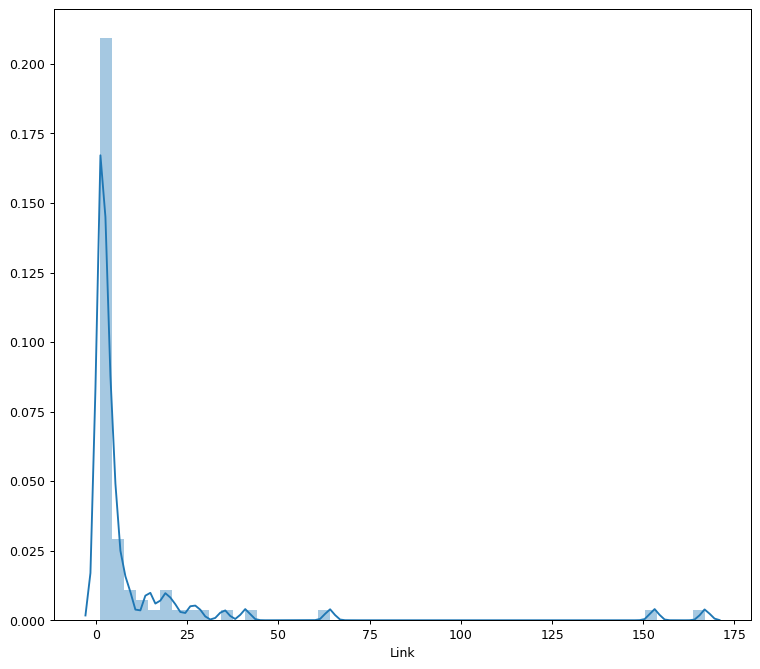

In [348]:
fig=plt.figure(figsize=(10, 9), dpi= 90, facecolor='w', edgecolor='k')
sns_plot = sns.distplot(df.groupby('Author').count()['Link'].sort_values(ascending=True))
fig = sns_plot.get_figure()


In [349]:
df.groupby('Author').count()['Link'].iloc[1:20]

Author
Adelina Mironova     3
Arslan               2
Artur Garifullin    14
Denis Gubko         41
Derzhava             1
Dmitrij Mokeev      35
Domino               1
HAWAII              64
ID 10510774          3
ID 10967599          1
ID 11072497          1
ID 11085747          2
ID 11194009          2
ID 11425264          2
ID 11560618          6
ID 12334809          1
ID 12555916          1
ID 12865930         28
ID 12907077          1
Name: Link, dtype: int64

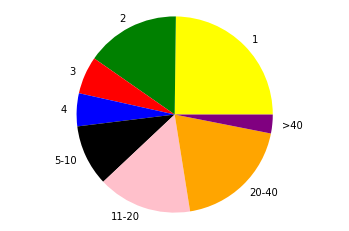

In [350]:
data_authors = df.groupby('Author', as_index = False).count().iloc[:, 1:2]
dd1 = data_authors.loc[data_authors['Link'] == 1]
dd2 = data_authors.loc[data_authors['Link'] == 2]
dd3 = data_authors.loc[data_authors['Link'] == 3]
dd4 = data_authors.loc[data_authors['Link'] == 4]
dd5_10 = data_authors.loc[data_authors['Link'] > 4].loc[data_authors['Link'] < 11]
dd11_20 = data_authors.loc[data_authors['Link'] > 4].loc[data_authors['Link'] < 21]
dd20_40 = data_authors.loc[data_authors['Link'] > 4].loc[data_authors['Link'] < 41]
dd40_I = data_authors.loc[data_authors['Link'] > 40]

len_authors = len(data_authors)
values = [int(len(dd1)*100/len_authors),
int(len(dd2)*100/len_authors),
int(len(dd3)*100/len_authors),
int(len(dd4)*100/len_authors),
int(len(dd5_10)*100/len_authors),
int(len(dd11_20)*100/len_authors),
int(len(dd20_40)*100/len_authors),
int(len(dd40_I)*100/len_authors)]

labels = ['1','2','3','4','5-10','11-20','20-40','>40']
colors = ['yellow','green','red','blue', 'black', 'pink', 'orange', 'purple']
plt.pie(values,labels=labels,colors=colors)
plt.axis('equal')
plt.show()


### Отбросим некоторые признаки

In [310]:
del df['Link']
del df['Commissions %']
del df['Street']
del df['Price_per_month']
del df['Author']

df.head()

,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
0,Vahitovskij,15,2,5,75,12,2008,75,400.000000
1,Novo-Savinovskij,13,2,12,62,18,-1,62,483.870968
2,Novo-Savinovskij,22,4,9,186,16,2011,186,537.634409
3,Vahitovskij,18,3,5,110,9,2006,110,454.545455
4,Vahitovskij,18,4,9,220,12,-1,220,590.909091


### В каких районах больше всего предложений

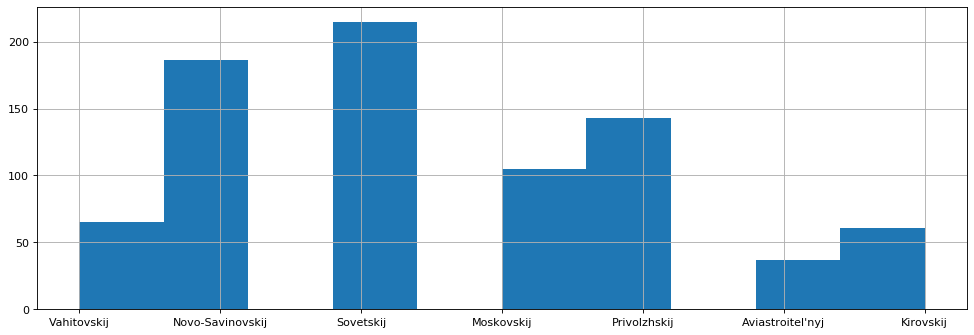

In [311]:
fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
df['District'].hist()

### Распределение цен на квадратный метр в среднем по Казани

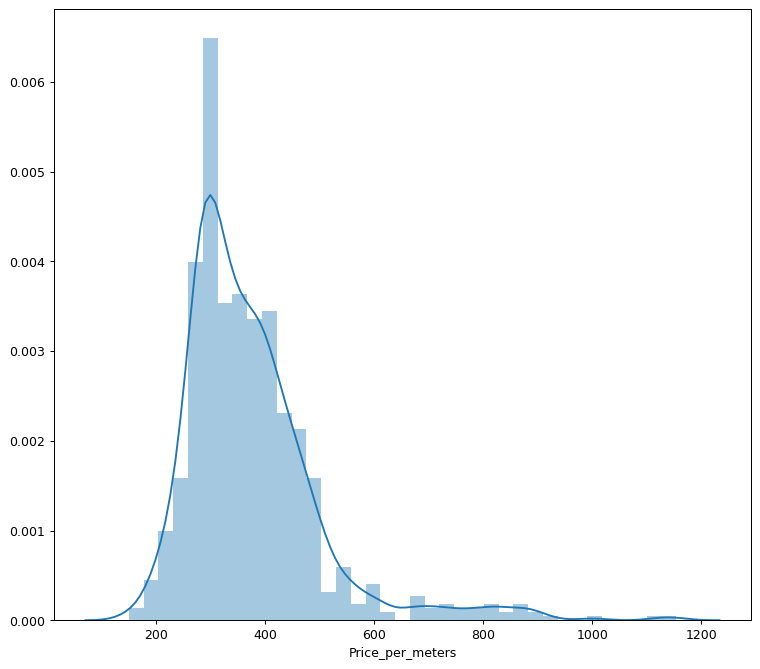

In [312]:
fig=plt.figure(figsize=(10, 9), dpi= 90, facecolor='w', edgecolor='k')
sns_plot = sns.distplot(df['Price_per_meters'])
fig = sns_plot.get_figure()


### Предобработаем данные

In [313]:
data = df.loc[df["Year_of_construction"] != -1]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 811
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              655 non-null    object 
 1   kitchen_meters        655 non-null    int64  
 2   How_many_rooms        655 non-null    int64  
 3   Floor                 655 non-null    int64  
 4   Square_meters         655 non-null    int64  
 5   All_floors            655 non-null    int64  
 6   Year_of_construction  655 non-null    int64  
 7   Living_area           655 non-null    int64  
 8   Price_per_meters      655 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 51.2+ KB


### Распределение предложений в завизимости от даты постройки здания

Text(0, 0.5, 'Предложения')

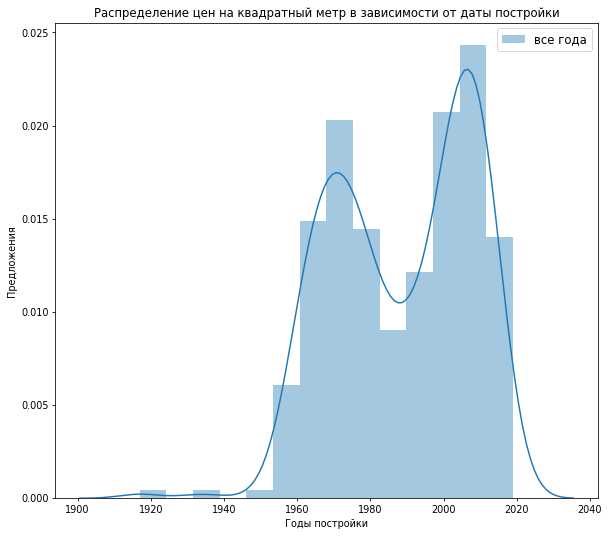

In [314]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(data['Year_of_construction'],  kde=True, label='все года')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от даты постройки')
plt.xlabel('Годы постройки')
plt.ylabel('Предложения')

#### Видим две моды: в середине 70х и в начале 10х

### Распределение цен в трёх категориях: до 1975х, между 1975 и 2010, и после

Text(0, 0.5, 'Цена')

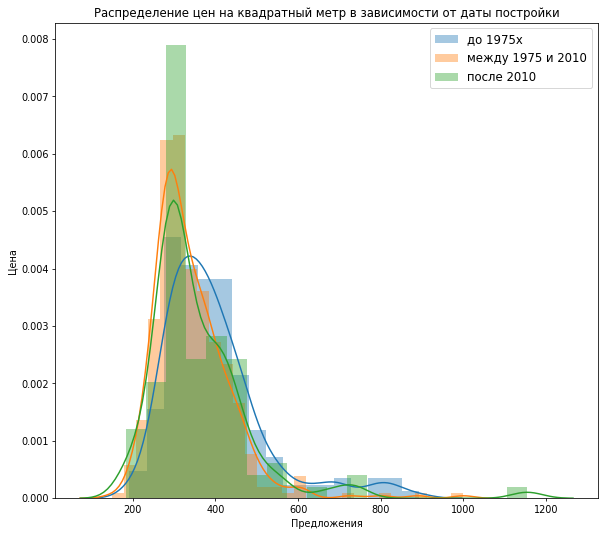

In [315]:
# data.loc[data["Year_of_construction"] < 1975]['Price_per_meters']

fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(data.loc[data["Year_of_construction"] <= 1975]['Price_per_meters'],  kde=True, label='до 1975х')
sns.distplot(data.loc[data["Year_of_construction"] > 1975].loc[data["Year_of_construction"] < 2010]['Price_per_meters'],  kde=True, label='между 1975 и 2010')
sns.distplot(data.loc[data["Year_of_construction"] >= 2010]['Price_per_meters'],  kde=True, label='после 2010')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от даты постройки')
plt.xlabel('Предложения')
plt.ylabel('Цена')

#### Видим, что, чем старше квартира, тем меньше стоимость её аренды, при этом предложений больше.
#### В среднем стоимость аренды квартиры в доме, построенном с 1975 по 2010 больше, чем в остальных категориях

### Исследование данных в зависимости от района

#### 1. Вахитовский район

In [316]:
data_vahitov = df.loc[df['District'] == 'Vahitovskij'].copy()
print(f"Количество предлжений в Вахитовском районе: {len(data_vahitov)}")
print(f"Среднее значение цены на метр в Вахитовском районе: {data_vahitov['Price_per_meters'].mean()}")
data_vahitov.head()

Количество предлжений в Вахитовском районе: 65
Среднее значение цены на метр в Вахитовском районе: 425.1272073585878


,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
0,Vahitovskij,15,2,5,75,12,2008,75,400.000000
3,Vahitovskij,18,3,5,110,9,2006,110,454.545455
4,Vahitovskij,18,4,9,220,12,-1,220,590.909091
6,Vahitovskij,12,2,2,65,5,-1,65,461.538462
8,Vahitovskij,18,4,3,180,4,2014,180,555.555556


Text(0, 0.5, 'Плотность')

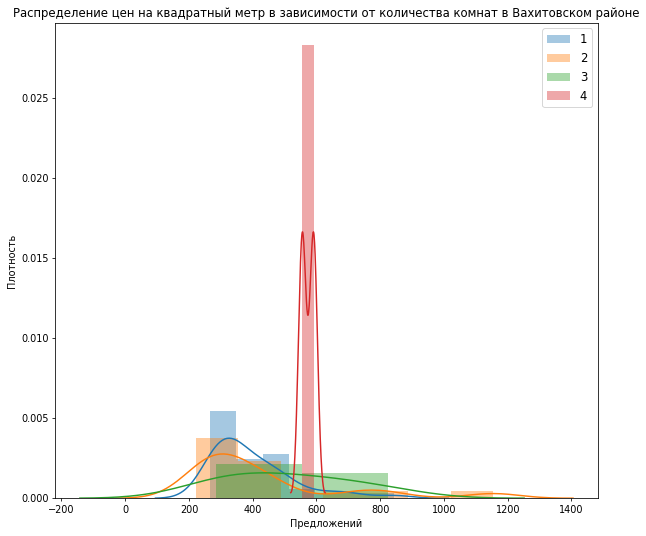

In [317]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(data_vahitov.loc[data_vahitov['How_many_rooms'] == 1]['Price_per_meters'],  kde=True, label='1')
sns.distplot(data_vahitov.loc[data_vahitov['How_many_rooms'] == 2]['Price_per_meters'],  kde=True, label='2')
sns.distplot(data_vahitov.loc[data_vahitov['How_many_rooms'] == 3]['Price_per_meters'],  kde=True, label='3')
sns.distplot(data_vahitov.loc[data_vahitov['How_many_rooms'] == 4]['Price_per_meters'],  kde=True, label='4')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от количества комнат в Вахитовском районе')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

#### Уберём квартиры с 4 комнатами для большей наглядности

Text(0, 0.5, 'Плотность')

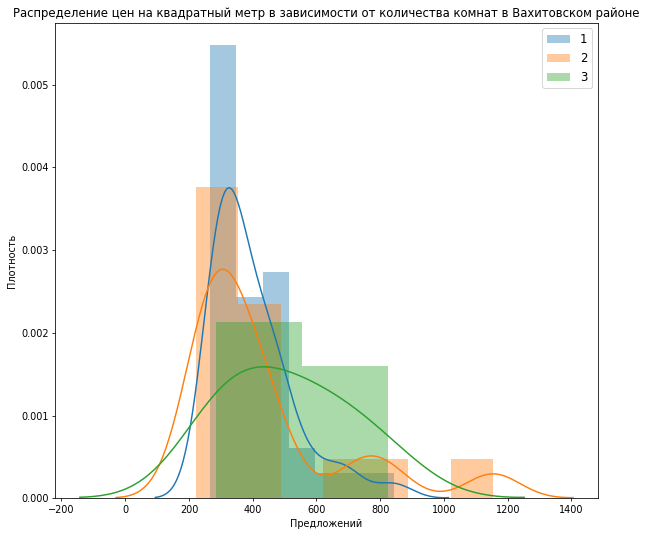

In [318]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(data_vahitov.loc[data_vahitov['How_many_rooms'] == 1]['Price_per_meters'],  kde=True, label='1')
sns.distplot(data_vahitov.loc[data_vahitov['How_many_rooms'] == 2]['Price_per_meters'],  kde=True, label='2')
sns.distplot(data_vahitov.loc[data_vahitov['How_many_rooms'] == 3]['Price_per_meters'],  kde=True, label='3')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от количества комнат в Вахитовском районе')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

#### 2. Кировский район

In [319]:
data_kirov = df.loc[df['District'] == 'Kirovskij'].copy()
print(f"Количество предлжений в Кировском районе: {len(data_kirov)}")
print(f"Среднее значение цены на метр в Кировском районе: {data_kirov['Price_per_meters'].mean()}")
data_kirov.head()

Количество предлжений в Кировском районе: 61
Среднее значение цены на метр в Кировском районе: 331.74230841996854


,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
24,Kirovskij,5,1,1,35,5,1969,35,371.428571
25,Kirovskij,13,2,7,65,18,2019,65,184.615385
37,Kirovskij,-1,3,5,82,18,-1,82,158.536585
38,Kirovskij,-1,3,12,82,18,-1,82,280.487805
40,Kirovskij,-1,1,3,42,6,2016,42,428.571429


Text(0, 0.5, 'Плотность')

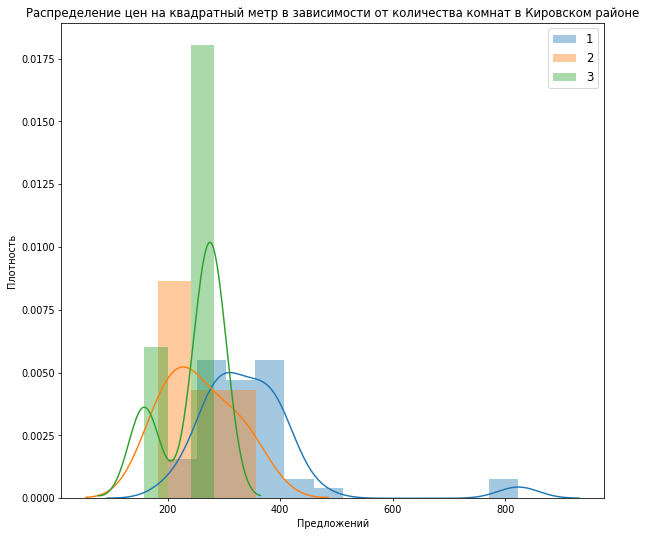

In [320]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(data_kirov.loc[data_kirov['How_many_rooms'] == 1]['Price_per_meters'],  kde=True, label='1')
sns.distplot(data_kirov.loc[data_kirov['How_many_rooms'] == 2]['Price_per_meters'],  kde=True, label='2')
sns.distplot(data_kirov.loc[data_kirov['How_many_rooms'] == 3]['Price_per_meters'],  kde=True, label='3')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от количества комнат в Кировском районе')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

#### 3. Приволжский район

In [321]:
data_privol = df.loc[df['District'] == 'Privolzhskij'].copy()
print(f"Количество предлжений в Приволжском районе: {len(data_privol)}")
print(f"Среднее значение цены на метр в Приволжском районе: {data_privol['Price_per_meters'].mean()}")
data_privol.head()

Количество предлжений в Приволжском районе: 143
Среднее значение цены на метр в Приволжском районе: 391.1134839222092


,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
12,Privolzhskij,8,1,4,37,9,1981,37,405.405405
17,Privolzhskij,8,1,6,35,10,-1,35,428.571429
18,Privolzhskij,10,1,13,34,19,-1,34,588.205882
19,Privolzhskij,7,1,8,37,9,1980,37,432.432432
21,Privolzhskij,10,1,6,45,10,2011,45,411.111111


Text(0, 0.5, 'Плотность')

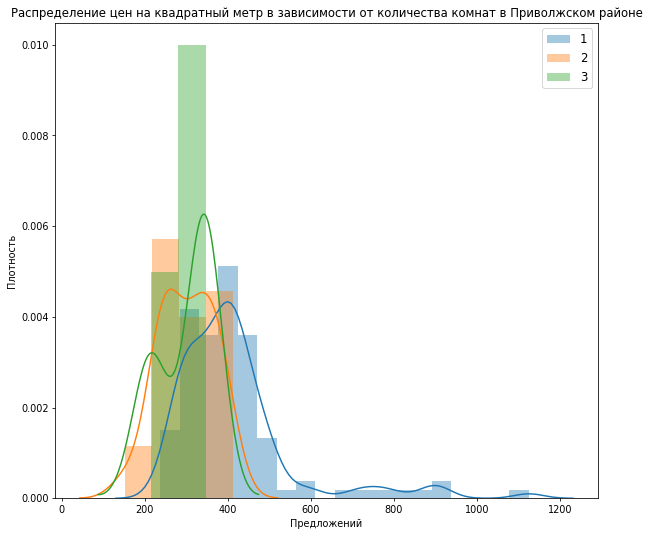

In [322]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(data_privol.loc[data_privol['How_many_rooms'] == 1]['Price_per_meters'],  kde=True, label='1')
sns.distplot(data_privol.loc[data_privol['How_many_rooms'] == 2]['Price_per_meters'],  kde=True, label='2')
sns.distplot(data_privol.loc[data_privol['How_many_rooms'] == 3]['Price_per_meters'],  kde=True, label='3')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от количества комнат в Приволжском районе')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

#### 4. Ново-Савиновский район

In [323]:
data_novsav = df.loc[df['District'] == 'Novo-Savinovskij'].copy()
print(f"Количество предлжений в Ново-Савиновском районе: {len(data_novsav)}")
print(f"Среднее значение цены на метр в Ново-Савиновском районе: {data_novsav['Price_per_meters'].mean()}")
data_novsav.head()

Количество предлжений в Ново-Савиновском районе: 186
Среднее значение цены на метр в Ново-Савиновском районе: 345.5857958576997


,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
1,Novo-Savinovskij,13,2,12,62,18,-1,62,483.870968
2,Novo-Savinovskij,22,4,9,186,16,2011,186,537.634409
5,Novo-Savinovskij,15,3,8,100,9,2008,100,350.000000
7,Novo-Savinovskij,-1,1,5,33,10,2006,33,454.545455
16,Novo-Savinovskij,6,1,4,32,5,1959,32,343.750000


Text(0, 0.5, 'Плотность')

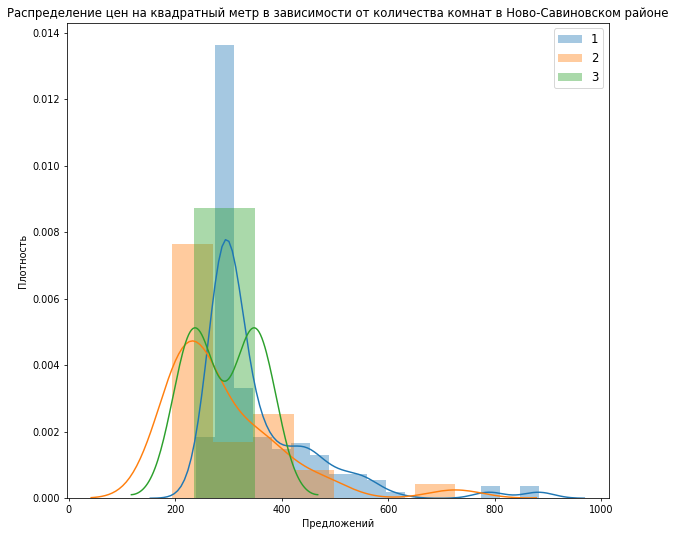

In [324]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(data_novsav.loc[data_novsav['How_many_rooms'] == 1]['Price_per_meters'],  kde=True, label='1')
sns.distplot(data_novsav.loc[data_novsav['How_many_rooms'] == 2]['Price_per_meters'],  kde=True, label='2')
sns.distplot(data_novsav.loc[data_novsav['How_many_rooms'] == 3]['Price_per_meters'],  kde=True, label='3')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от количества комнат в Ново-Савиновском районе')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

### Распределение цен аренды на квадратный метр в зависимости от районов для всех годов постройки

Text(0, 0.5, 'Плотность')

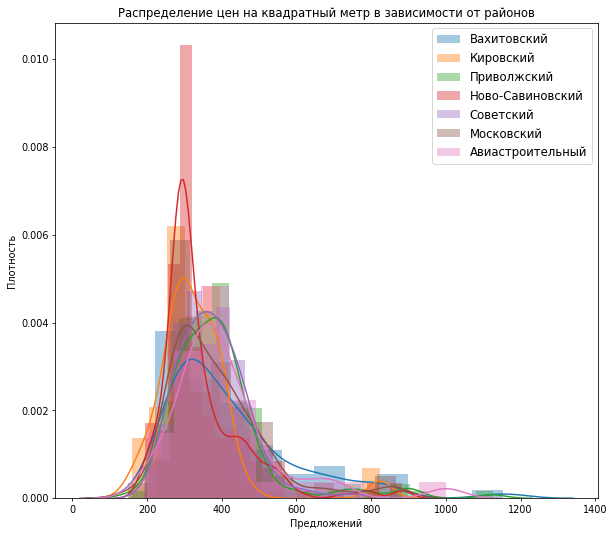

In [325]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(data_vahitov['Price_per_meters'],  kde=True, label='Вахитовский')
sns.distplot(data_kirov['Price_per_meters'],  kde=True, label='Кировский')
sns.distplot(data_privol['Price_per_meters'],  kde=True, label='Приволжский')
sns.distplot(data_novsav['Price_per_meters'],  kde=True, label='Ново-Савиновский')
sns.distplot(df.loc[df['District'] == 'Sovetskij']['Price_per_meters'],  kde=True, label='Советский')
sns.distplot(df.loc[df['District'] == 'Moskovskij']['Price_per_meters'],  kde=True, label='Московский')
sns.distplot(df.loc[df['District'] == "Aviastroitel'nyj"]['Price_per_meters'],  kde=True, label='Авиастроительный')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от районов')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

### Распределение цен аренды на квадратный метр в зависимости от районов для годов постройки > 2000

Text(0, 0.5, 'Плотность')

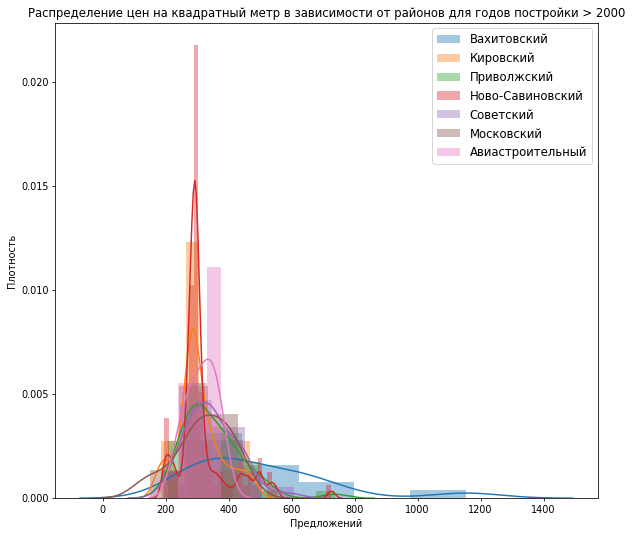

In [326]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(data_vahitov.loc[data_vahitov["Year_of_construction"] >= 2000]['Price_per_meters'],  kde=True, label='Вахитовский')
sns.distplot(data_kirov.loc[data_kirov["Year_of_construction"] >= 2000]['Price_per_meters'],  kde=True, label='Кировский')
sns.distplot(data_privol.loc[data_privol["Year_of_construction"] >= 2000]['Price_per_meters'],  kde=True, label='Приволжский')
sns.distplot(data_novsav.loc[data_novsav["Year_of_construction"] >= 2000]['Price_per_meters'],  kde=True, label='Ново-Савиновский')
sns.distplot(df.loc[df['District'] == 'Sovetskij'].loc[df["Year_of_construction"] >= 2000]['Price_per_meters'],  kde=True, label='Советский')
sns.distplot(df.loc[df['District'] == 'Moskovskij'].loc[df["Year_of_construction"] >= 2000]['Price_per_meters'],  kde=True, label='Московский')
sns.distplot(df.loc[df['District'] == "Aviastroitel'nyj"].loc[df["Year_of_construction"] >= 2000]['Price_per_meters'],  kde=True, label='Авиастроительный')


plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от районов для годов постройки > 2000')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

### Распределение цен на квадратный метр в зависимости от количества комнат в среднем во всех районов

C:\Users\Lenar\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0, 0.5, 'Плотность')

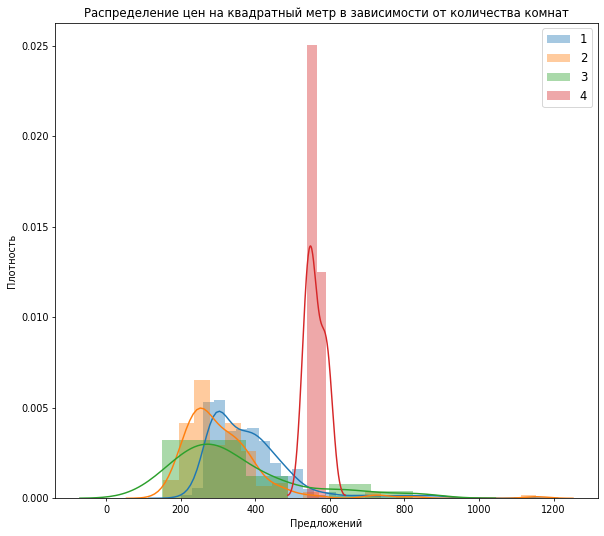

In [327]:
data_novsav = df.loc[df['How_many_rooms'] == '1']['Price_per_meters']


fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(df.loc[df['How_many_rooms'] == 1]['Price_per_meters'],  kde=True, label='1')
sns.distplot(df.loc[df['How_many_rooms'] == 2]['Price_per_meters'],  kde=True, label='2')
sns.distplot(df.loc[df['How_many_rooms'] == 3]['Price_per_meters'],  kde=True, label='3')
sns.distplot(df.loc[df['How_many_rooms'] == 4]['Price_per_meters'],  kde=True, label='4')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от количества комнат')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

### Распределение цен на квадратный метр в зависимости от этажности квартиры

Text(0, 0.5, 'Плотность')

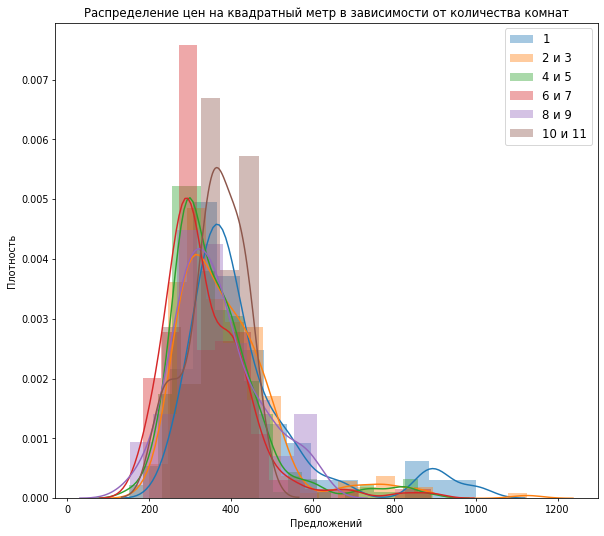

In [328]:

fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(df.loc[df['Floor'] == 1]['Price_per_meters'],  kde=True, label='1')
sns.distplot(df.loc[df['Floor'] > 1].loc[df['Floor'] < 4]['Price_per_meters'],  kde=True, label='2 и 3')
sns.distplot(df.loc[df['Floor'] >= 4].loc[df['Floor'] < 6]['Price_per_meters'],  kde=True, label='4 и 5')
sns.distplot(df.loc[df['Floor'] >= 6].loc[df['Floor'] < 8]['Price_per_meters'],  kde=True, label='6 и 7')
sns.distplot(df.loc[df['Floor'] >= 8].loc[df['Floor'] < 10]['Price_per_meters'],  kde=True, label='8 и 9')
sns.distplot(df.loc[df['Floor'] >= 10].loc[df['Floor'] < 12]['Price_per_meters'],  kde=True, label='10 и 11')

plt.legend(prop={'size': 12})
plt.title('Распределение цен на квадратный метр в зависимости от количества комнат')
plt.xlabel('Предложений')
plt.ylabel('Плотность')

## Построение модели

### Преобразуем нечисловые признаки в числовые

In [332]:
data = data.loc[data["kitchen_meters"] != -1]
data

,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
0,Vahitovskij,15,2,5,75,12,2008,75,400.000000
2,Novo-Savinovskij,22,4,9,186,16,2011,186,537.634409
3,Vahitovskij,18,3,5,110,9,2006,110,454.545455
5,Novo-Savinovskij,15,3,8,100,9,2008,100,350.000000
8,Vahitovskij,18,4,3,180,4,2014,180,555.555556
...,...,...,...,...,...,...,...,...,...
795,Aviastroitel'nyj,8,2,4,55,9,1978,55,218.181818
801,Sovetskij,9,1,1,36,9,1992,36,333.333333
803,Sovetskij,10,1,4,40,9,1988,40,400.000000
804,Sovetskij,9,1,3,38,8,2003,38,342.105263


In [333]:
enc = LabelEncoder()
data.iloc[:,0] = enc.fit_transform(data.iloc[:,0])

,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
0,Vahitovskij,15,2,5,75,12,2008,75,400.000000
1,Novo-Savinovskij,13,2,12,62,18,-1,62,483.870968
2,Novo-Savinovskij,22,4,9,186,16,2011,186,537.634409
3,Vahitovskij,18,3,5,110,9,2006,110,454.545455
4,Vahitovskij,18,4,9,220,12,-1,220,590.909091


In [334]:
data.head()

,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
0,6,15,2,5,75,12,2008,75,400.000000
2,3,22,4,9,186,16,2011,186,537.634409
3,6,18,3,5,110,9,2006,110,454.545455
5,3,15,3,8,100,9,2008,100,350.000000
8,6,18,4,3,180,4,2014,180,555.555556


### Применим линейную модель

MSE: 6997.669
RMSE: 83.652
MAE: 61.251


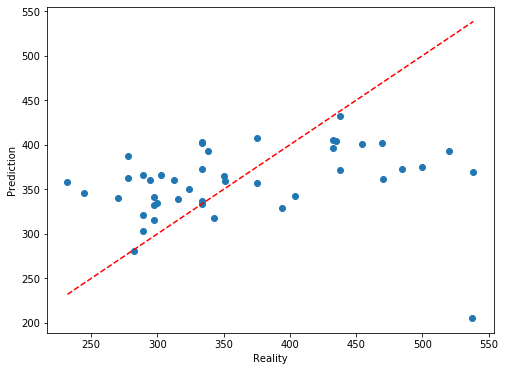

In [336]:
train_data, test_data, train_labels, test_labels = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size = 0.1, random_state=0)

model = LinearRegression()
model.fit(X=train_data, y=train_labels)

accuracy_report(test_labels, model.predict(test_data))
